In [2]:
from IPython.display import Image

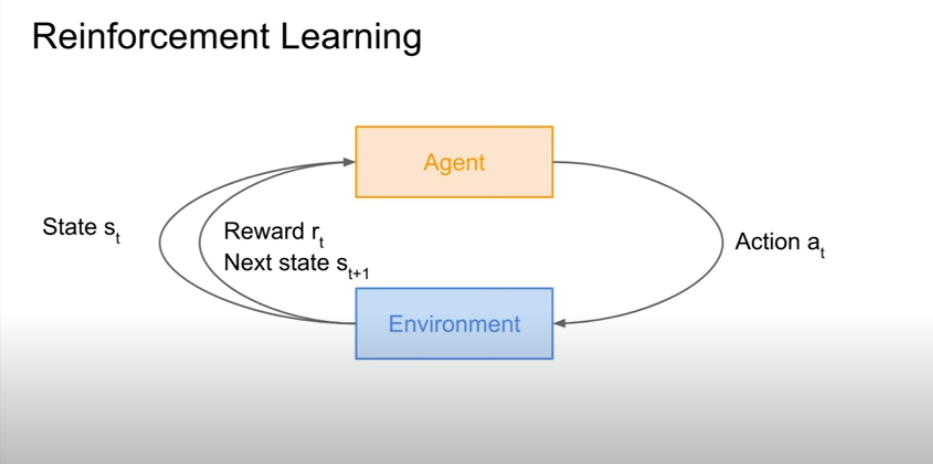

In [5]:
Image(r'C:\Users\Owner\Desktop\정리한파일\RL\picture1.png', width = 800, height = 400)

__Agent__

- Environment로부터 현제 시점 t에서의 정보($s_t$)와 보상($r_t$)를 받음.
- $s_t$에서 어떤 행동($a_t$)을 함.

__Environment__

- Agent가 한 행동($a_t$)을 통해서 상태를 변화시킴. $s_t$가 $s_{t+1}$이 됨.
- Agent에게 변화된 상태값 $s_{t+1}$과 $r_{t+1}$을 전달.

## Markov Decision Process
- 순차적으로 행동을 결정해야 하는 문제를 풀기 위해 수학적으로 표현한 것
- 5가지의 중요한 요소가 있다
- $MDP = (S, A, P, R, \gamma)$
    - 상태의 집합 $S$
    - 액션의 집합 $A$
    - 보상 함수 $R$
        - $R_s^a = E[R_{t+1}|S_t = s, A_t = a]$
    - Discount Factor $\gamma$
        - 반환값: $G_t = R_t + \gamma R_{t+1} + \gamma^2 R_{t+2} + ... + \gamma^{T-1}R_T$
    - 전이 확률 행렬 $P$
        - $P^a_{ss'}$
        - 상태 $s$에서 액션 $a$를 선택했을 때 다음 상태가 $s'$가 될 확률

## Policy

### $\pi(a|s) = P[A_t = a|S_t = s]$
- 상태 $s$에서 액션 $a$를 선택할 확률

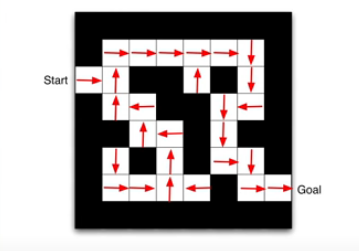

In [10]:
Image(r'C:\Users\Owner\Desktop\정리한파일\RL\policy.png', width = 400, height = 200)

이 그림은 Deterministic한 Optimal policy의 예시이고 Stochastic policy의 경우에는 확률이 나타나게됨.

## Value
- Policy를 따르기 때문에 Policy가 있어야함

### State-value function
### $v_{\pi}(s) = E_\pi[G_t|S_t = s]$ (Monte Carlo policy evaluation)
- 상태 $s$부터 $\pi$를 따라갔을 때 반환값의 기댓값. (모든 액션을 반영한다)
- 상태를 입력으로 받으며 지금의 상태를 평가해주는 값

### Action-value function
### $q_\pi(s,a) = E_\pi[G_t|S_t = s, A_t = a]$ (Monte Carlo policy evaluation)
- $s$에서 $a$를 선택하고, 그 이후에는 $\pi$를 따라갈 때 얻는 리턴의 기댓값.
- 상태와 행동을 입력으로 받으며 상태와 행동을 평가해주는 함수

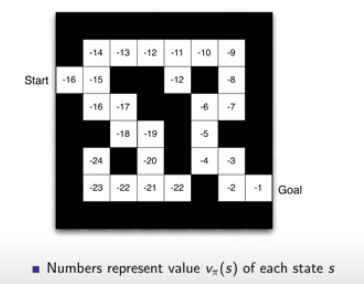

In [12]:
Image(r'C:\Users\Owner\Desktop\정리한파일\RL\value.png', width = 400, height = 200)

## 벨만 기대 방정식
- 반복적으로 기대값을 업데이트해 나가기 위해 현재의 가치함수와 다음의 가치함수 사이의 관계를 정의한 방정식이다.

### State-value function
### $v_\pi(s) = E[G_t | S_t = s]$ 
### $= E[R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + ... | S_t = s]$
### $= E[R_{t+1} + \gamma (R_{t+2} + \gamma R_{t+3} + ...) | S_t = s]$
### $= E[R_{t+1} + \gamma G_{t+1} | S_t = s]$
### $= E[R_{t+1} + \gamma v(S_{t+1}) | S_t = s]$ (Temporal Difference policy evaluation)

### Action-value function
### $q_\pi(s,a) = E_\pi[G_t|S_t = s, A_t = a]$ 
### $ = E_\pi [R_{t+1} + \gamma q_\pi(S_{t+1}, A_{t+1}) | S_t = s, A_t = a]$ (Temporal Difference policy evaluation)








*$[R_{t+1} + \gamma v(S_{t+1}) | S_t = s]$ 이 값은 그냥 어떤 state에서의 하나의 샘플이라고 보면 된다.

## Monte Carlo vs Temporal Difference

- Monte Carlo 방법은 에피소드가 끝이 있어야 학습할 수 있음.
    - 에피소드가 끝나고 모든 state의 반환값을 계산한다.
    - 여러개의 에피소드 반환값을 더해서 평균을 구해서 가치함수를 학습.
- Temporal Difference 방법은 에피소드가 끝나지 않아도 학습할 수 있음
    - 한 스탭만 가보고 그 한 스탭로부터 받는 데이터로 계속 업데이트

## Policy Gradient

- Value-based: Value function 학습 (Value function은 policy가 정해져야 정의된다. policy가 있어야함)
- Policy-based: 정책이 있는데 그 정책을 강화하는 것 (가치함수는 없고 policy만 있음)

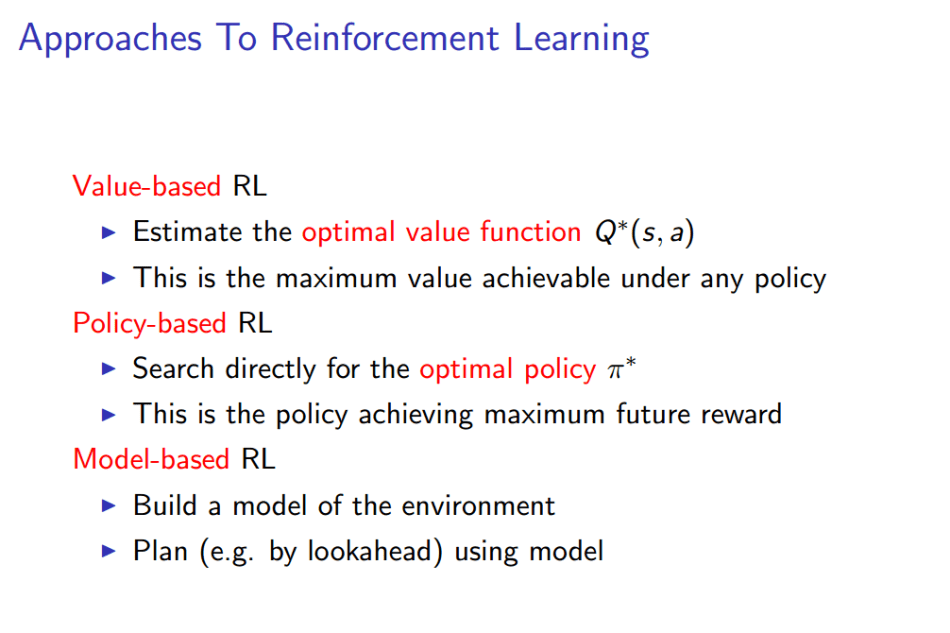

In [13]:
Image(r'C:\Users\Owner\Desktop\정리한파일\RL\13.png', width = 800, height = 400)

### Policy-based 강화학습을 쓰는 이유
- 액션의 값이 많거나 Continuous한 경우에서도 학습 가능
    - Value-based의 경우, 액션 값이 너무 많으면 학습하기 힘들다. 모든 액션에 대한 Q값을 학습해야되기 때문에 계산량이 많아진다.
- Stochastic Policy도 학습 가능
    - Value-based는 deterministic하게 선택

### REINFORCE Algorithm

### Policy를 Neural net에 적용
$\pi_\theta (a|s) = P[A_t = a | S_t = s]$
- policy의 파라미터를 $\theta$라고 한다. 
- S가 주어졌을 때 a의 확률을 나타내는 벡터

### 목적함수 U($\theta$)
- $\pi_\theta$ 의 성능을 나타내는 함수 ($\theta$의 점수라고 볼 수 있음)


#### $U(\theta) = E[\sum\limits_{t=0}^T R(s_t, a_t)|\pi_\theta]$

- $\pi_\theta$가 주어졌을때 Reward의 총합의 기댓값이고 함수의 성능을 높여주는 $\theta$를 구해서 업데이트한다.
- $\pi_\theta$를 따랐을 때 평균 얼만큼의 보상을 받는지
- Policy가 좋을수록 $U(\theta)$값은 크다 따라서 $U(\theta)$를 최대화 시켜주기 위해 $\theta$에 대한 Gradient Ascent를 해준다.
- 미분을 하려면 기댓값 연산자가 없어야한다.

### 기댓값 연산자를 없애주는 과정
- $s_0, a_0, s_1, a_1....s_t, a_t$를 Trajectory라고 하며 이것을 $\tau$이라고 하자. (첫번째 state s0에서 어떠한 액션을 했을 때 s1에 도착하고 또 s1에서 어떠한 action을 하면 또 다른 state로 가는 과정)
- R($\tau$) = $\sum\limits_{t = 0}^T R(s_t, a_t)$
(특정 Trajectory에서 발생한 Reward의 합 식)

- 이 Reward 값의 기대값

$U(\theta) = E[\sum\limits_{t = 0}^T R(s_t, a_t) | \pi_\theta] = \sum\limits_\tau P(\tau|\theta)R(\tau)$
- 어떤 특정 $\tau$에서 받은 reward의 총합과 그 Trajectory($\tau$)가 일어날 확률을 곱해서 모두 더한 값. 이 세상에 존재하는 모든 Trajectory($\tau$)에 대한 값

### 미분해보자
$U(\theta) = \sum\limits_\tau P(\tau|\theta)R(\tau)$

- $\theta$에 대해 gradient를 곱해준 미분값
$\nabla_\theta U(\theta) = \nabla_\theta \sum\limits_\tau P(\tau|\theta)R(\tau)$

$\nabla_\theta U(\theta) = \sum\limits_\tau P(\tau|\theta)R(\tau)\nabla_\theta logP(r|\theta)$


= $E_\tau [R(\tau)\nabla_\theta logP(\tau|\theta)] $

확률값은 다시 기댓값으로 만들 수 있기 때문에 다시 기댓값으로 만들어준다
- 이 $\tau$가 발생할 확률 ($\nabla_\theta logP(\tau|\theta)$)은 어떻게 구하나?
    - $\nabla_\theta logP(\tau|\theta) = \nabla_\theta log [\prod\limits_{t=0}^T P\tau(s_{t+1}|s_t, a_t) * \pi_\theta (a_t|s_t)]$
    - __state 0에서 action 0을 선택할 확률 * s0과 a0이 정해졌을때 s1에 도착할 확률__이 특정 __trajectory가 발생할 확률__이다


- $E_\tau [R(\tau)\nabla_\theta logP(\tau|\theta)] $ 이 식을 보면
    - $R(\tau)$이 + 면 그 경로의 로그 확률을 증가시킴
    - $R(\tau)$이 - 면 그 경로의 로그 확률을 감소시킴
    
즉, 어떠한 __Trajectory__의 Reward를 계산해봤을때 __Reward가 높았다__면 __그 Trajectory가 더 발생할 수 있도록 $\theta$를 업데이트__($\theta$값을 크게). log(P)가 커질 수 있도록 업데이트.

반대로 __reward가 낮다__면 __확률을 더 낮출 수 있도록 $\theta$값을 업데이트__를 하는 것

파라미터를 업데이트할때 원래 Loss값을 이용해서 정답과 예측값의 오차를 최소화 하는 것이지만 여기서는 정답과 예측값의 오차를 최소화하는 function이 아니라 성능을 나타내는 함수이기 때문에 최대화하는 __gradient ascent__를 사용한다.

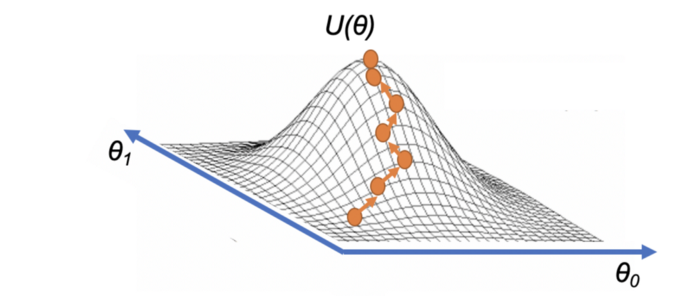

In [16]:
Image(r'C:\Users\Owner\Desktop\정리한파일\RL\gradient ascent.png', width = 800, height = 400)

### $\tau$를 없애보자

$ \nabla_\theta U(\theta) = E_\tau [\sum\limits_{t=0}^T \nabla_\theta log \pi_\theta (a_t|s_t) G_t]$

#### Sample Mean을 이용하자

 $ \nabla_\theta U(\theta) = 1/m \sum\limits_{\tau=1}^m \sum\limits_{t=0}^T \nabla_\theta log \pi_\theta (a_t|s_t) G_t$
 
- m개의 에피소드를 쌓고 각 에피소드의 첫 스탭부터 끝 스텝까지 $\nabla_\theta log \pi_\theta (a_t|s_t)$ * $G_t$값을 계산하고 모두 더한다. 그러면 그값은 gradient기 때문에 벡터 값을 가지게 된다. 이제 그 값을 m으로 나눠주게되면 평균값이 나오고 그 값으로 theta를 업데이트하면 된다. 
이 방식이 __REINFORCE 알고리즘__이다

### $\theta$ 업데이트

###  $\theta = \theta + \alpha \nabla_\theta U(\theta)$